In [1]:
from google.colab import files
uploaded = files.upload()

Saving Reviews.csv to Reviews.csv


In [2]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv('Reviews.csv', encoding='latin1')

In [4]:
df.head()

,Location_Name,Located_City,Location,Location_Type,User_ID,User_Location,User_Locale,User_Contributions,Travel_Date,Published_Date,Rating,Helpful_Votes,Title,Text
0,Arugam Bay,Arugam Bay,"Arugam Bay, Eastern Province",Beaches,User 1,"Dunsborough, Australia",en_US,8,2019-07,2019-07-31T07:53:21-04:00,5,1,Best nail spa in Arugam bay on the water!,I had a manicure here and it really was profes...
1,Arugam Bay,Arugam Bay,"Arugam Bay, Eastern Province",Beaches,User 2,"Bendigo, Australia",en_US,4,2019-06,2019-07-21T21:50:11-04:00,4,0,Best for surfing,"Overall, it is a wonderful experience. We visi..."
2,Arugam Bay,Arugam Bay,"Arugam Bay, Eastern Province",Beaches,User 3,"Melbourne, Australia",en_US,13,2019-07,2019-07-15T18:52:55-04:00,5,0,We Love Arugam Bay,"Great place to chill, swim, surf, eat, shop, h..."
3,Arugam Bay,Arugam Bay,"Arugam Bay, Eastern Province",Beaches,User 4,"Ericeira, Portugal",en_US,4,2019-06,2019-07-03T10:32:41-04:00,5,0,Sun and waves.,Good place for surf and a few stores to going ...
4,Arugam Bay,Arugam Bay,"Arugam Bay, Eastern Province",Beaches,User 5,"Pistoia, Italy",en_US,14,2019-07,2019-07-02T17:07:02-04:00,5,0,"Great swimming, surfing, great fish aznd frien...",This place is great for surfing but even if yo...


In [5]:
df.tail()

,Location_Name,Located_City,Location,Location_Type,User_ID,User_Location,User_Locale,User_Contributions,Travel_Date,Published_Date,Rating,Helpful_Votes,Title,Text
16151,Nallur Kovil,Jaffna,"Jaffna, Northern Province",Religious Sites,User 10474,"Bern, Switzerland",en_US,9,2015-03,2015-04-08T01:56:47-04:00,5,2,Beautiful Hindu Tempel and great Architecture,Beautiful Hindu Tempel and great Architecture....
16152,Nallur Kovil,Jaffna,"Jaffna, Northern Province",Religious Sites,User 1066,"London, United Kingdom",en_UK,96,2015-02,2015-03-02T11:18:34-05:00,4,6,"Beautiful temple, but why build more towers?",A large beautiful temple with monumental brigh...
16153,Nallur Kovil,Jaffna,"Jaffna, Northern Province",Religious Sites,User 5362,"London, United Kingdom",en_US,57,2015-02,2015-02-24T04:56:09-05:00,4,0,A bit boring,"One of the major sights in Jaffna, so probably..."
16154,Nallur Kovil,Jaffna,"Jaffna, Northern Province",Religious Sites,User 5412,"Aberdeen, United Kingdom",en_UK,27,2015-01,2015-02-22T11:52:53-05:00,5,0,temple,Nallur Kandaswamy Kovil or Nallur Murugan Kovi...
16155,Nallur Kovil,Jaffna,"Jaffna, Northern Province",Religious Sites,User 10475,"Mumbai, Maharashtra, India",en_IN,47,2014-12,2015-02-22T05:41:58-05:00,5,0,Nallur Murugan,It is a nice and big temple. It was not destro...


In [10]:
print(df.describe())

                       Location_Name  Located_City  \
count                          16156         16156   
unique                            76            36   
top     pinnawala elephant orphanage  nuwara eliya   
freq                             369          2221   

                             Location    Location_Type          User_Location  \
count                           16156            16156                  16156   
unique                             38               11                   3278   
top     nuwara eliya central province  religious sites  london united kingdom   
freq                             2147             3017                    950   

       User_Locale Travel_Date       Published_Date Rating  \
count        16156       16156                16156  16156   
unique          71         147                16156      5   
top          en_us      201901  20190731t0753210400      5   
freq          8781         636                    1   7649   

            

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16156 entries, 0 to 16155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Location_Name   16156 non-null  object
 1   Located_City    16156 non-null  object
 2   Location        16156 non-null  object
 3   Location_Type   16156 non-null  object
 4   User_Location   16156 non-null  object
 5   User_Locale     16156 non-null  object
 6   Travel_Date     16156 non-null  object
 7   Published_Date  16156 non-null  object
 8   Rating          16156 non-null  object
 9   Text            16156 non-null  object
dtypes: object(10)
memory usage: 1.2+ MB
None


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

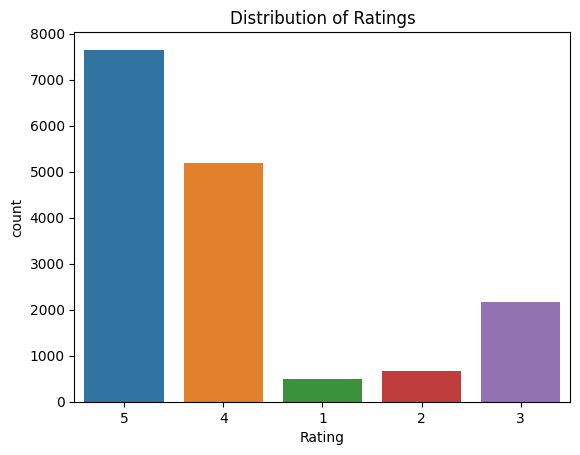

In [13]:
sns.countplot(x='Rating', data= df)
plt.title('Distribution of Ratings')
plt.show()

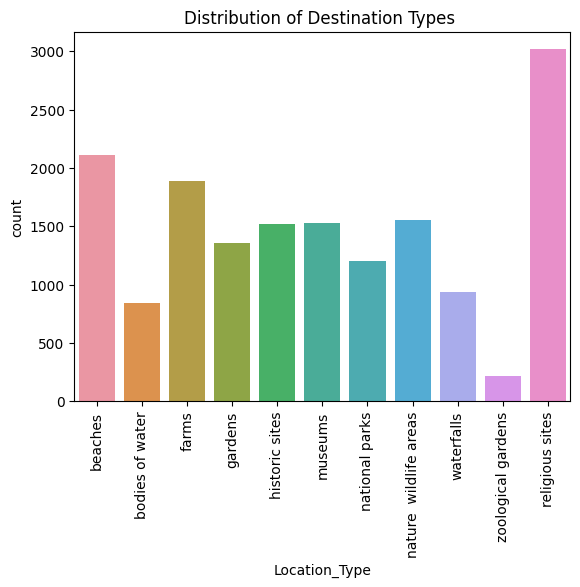

In [14]:
sns.countplot(x='Location_Type', data= df)
plt.title('Distribution of Destination Types ')
plt.xticks(rotation=90)
plt.show()

In [15]:
print(df.isnull().sum())

Location_Name     0
Located_City      0
Location          0
Location_Type     0
User_Location     0
User_Locale       0
Travel_Date       0
Published_Date    0
Rating            0
Text              0
dtype: int64


In [16]:
import re

for column in df.columns:
    if df[column].dtype != 'object':  # Check if the column is not already a string
        df[column] = df[column].astype(str)  # Convert non-string column to string
    df[column] = df[column].apply(lambda x: re.sub(r'[^\w\s]', '', x))


print(df.head())

  Location_Name Located_City                     Location Location_Type  \
0    arugam bay   arugam bay  arugam bay eastern province       beaches   
1    arugam bay   arugam bay  arugam bay eastern province       beaches   
2    arugam bay   arugam bay  arugam bay eastern province       beaches   
3    arugam bay   arugam bay  arugam bay eastern province       beaches   
4    arugam bay   arugam bay  arugam bay eastern province       beaches   

           User_Location User_Locale Travel_Date       Published_Date Rating  \
0  dunsborough australia       en_us      201907  20190731t0753210400      5   
1      bendigo australia       en_us      201906  20190721t2150110400      4   
2    melbourne australia       en_us      201907  20190715t1852550400      5   
3      ericeira portugal       en_us      201906  20190703t1032410400      5   
4          pistoia italy       en_us      201907  20190702t1707020400      5   

                                                Text  
0  i had a ma

In [17]:
for column in df.columns:
  df[column] = df[column].str.lower()

df.head()

,Location_Name,Located_City,Location,Location_Type,User_Location,User_Locale,Travel_Date,Published_Date,Rating,Text
0,arugam bay,arugam bay,arugam bay eastern province,beaches,dunsborough australia,en_us,201907,20190731t0753210400,5,i had a manicure here and it really was profes...
1,arugam bay,arugam bay,arugam bay eastern province,beaches,bendigo australia,en_us,201906,20190721t2150110400,4,overall it is a wonderful experience we visite...
2,arugam bay,arugam bay,arugam bay eastern province,beaches,melbourne australia,en_us,201907,20190715t1852550400,5,great place to chill swim surf eat shop have s...
3,arugam bay,arugam bay,arugam bay eastern province,beaches,ericeira portugal,en_us,201906,20190703t1032410400,5,good place for surf and a few stores to going ...
4,arugam bay,arugam bay,arugam bay eastern province,beaches,pistoia italy,en_us,201907,20190702t1707020400,5,this place is great for surfing but even if yo...


In [ ]:
columns_to_remove = ['User_ID','User_Contributions','Helpful_Votes', 'Title']

In [18]:
for col in df.columns:
  if 'User_ID' in col:
    del df[col]
  if 'User_Contributions' in col:
    del df[col]
  if 'Helpful_Votes' in col:
    del df[col]
  if 'Title' in col:
    del df[col]

df

,Location_Name,Located_City,Location,Location_Type,User_Location,User_Locale,Travel_Date,Published_Date,Rating,Text
0,arugam bay,arugam bay,arugam bay eastern province,beaches,dunsborough australia,en_us,201907,20190731t0753210400,5,i had a manicure here and it really was profes...
1,arugam bay,arugam bay,arugam bay eastern province,beaches,bendigo australia,en_us,201906,20190721t2150110400,4,overall it is a wonderful experience we visite...
2,arugam bay,arugam bay,arugam bay eastern province,beaches,melbourne australia,en_us,201907,20190715t1852550400,5,great place to chill swim surf eat shop have s...
3,arugam bay,arugam bay,arugam bay eastern province,beaches,ericeira portugal,en_us,201906,20190703t1032410400,5,good place for surf and a few stores to going ...
4,arugam bay,arugam bay,arugam bay eastern province,beaches,pistoia italy,en_us,201907,20190702t1707020400,5,this place is great for surfing but even if yo...
...,...,...,...,...,...,...,...,...,...,...
16151,nallur kovil,jaffna,jaffna northern province,religious sites,bern switzerland,en_us,201503,20150408t0156470400,5,beautiful hindu tempel and great architecture ...
16152,nallur kovil,jaffna,jaffna northern province,religious sites,london united kingdom,en_uk,201502,20150302t1118340500,4,a large beautiful temple with monumental brigh...
16153,nallur kovil,jaffna,jaffna northern province,religious sites,london united kingdom,en_us,201502,20150224t0456090500,4,one of the major sights in jaffna so probably ...
16154,nallur kovil,jaffna,jaffna northern province,religious sites,aberdeen united kingdom,en_uk,201501,20150222t1152530500,5,nallur kandaswamy kovil or nallur murugan kovi...


In [9]:
df.to_csv('new_Review_Data.csv', index=False)